In [3]:
import matplotlib.pyplot as plt 
import scipy.misc

import numpy as np
from keras.layers import Dense, Dropout, Flatten, Input, Conv2D, Cropping2D
from keras.layers import MaxPooling2D, ZeroPadding2D, BatchNormalization, Activation, Add, merge, concatenate
from keras.models import Model
from keras.utils.layer_utils import print_summary
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

from keras import __version__ as kv
from scipy import __version__ as sv
from matplotlib import __version__ as mv
from numpy import __version__ as nv

print kv
print sv
print mv
print nv

Using TensorFlow backend.


2.0.5
0.19.1
2.0.0
1.13.0


In [4]:
# Local files
import utils
reload(utils)

<module 'utils' from 'utils.pyc'>

# Data

### Config

In [5]:
trained_model_dir = '/home/ubuntu/data/sar/experiment_crops_20170815/trained_models/2.0-mph_as-best_baseline_with_distance_feature/'

In [6]:
train_dir = '/home/ubuntu/data/sar/experiment_crops_20170815/train/50x50/'
valid_dir = '/home/ubuntu/data/sar/experiment_crops_20170815/validate/50x50/'

In [7]:
input_shape = (50, 50, 1)
num_classes = 3

### Convert tif2png

Done in 1.1-mph_as_kd-baseline-simple_CNN_from_scratch.ipynb

### Add dist2land feature

In [8]:
train_crops, train_filename, train_feature, train_class, \
valid_crops, valid_filename, valid_feature, valid_class = utils.add_dist2land_experiment_crops_20170815()

In [9]:
print "training crops:", len(train_crops)
print "training features:", len(train_feature)
print "validation crops:", len(valid_filename)
print "validation features:", len(valid_feature)
print type(train_crops), type(train_crops[0]), train_crops[0].shape

training crops: 1996
training features: 1996
validation crops: 499
validation features: 499
<type 'list'> <type 'numpy.ndarray'> (50, 50)


In [10]:
# Reshape for keras format
np_train_class = np.array(train_class)
np_train_filename = np.array(train_filename)
np_train_crops = np.array(train_crops)
np_train_feature = np.array(train_feature)

np_valid_class = np.array(valid_class)
np_valid_filename = np.array(valid_filename)
np_valid_crops = np.array(valid_crops)
np_valid_feature = np.array(valid_feature)

np_train_crops = np.expand_dims(np_train_crops, axis=3)
np_train_feature = np.expand_dims(np_train_feature, axis=1)

np_valid_crops = np.expand_dims(np_valid_crops, axis=3)
np_valid_feature = np.expand_dims(np_valid_feature, axis=1)

In [11]:
print np_train_crops.shape
print np_train_feature.shape
print np_train_class.shape

print np_valid_crops.shape
print np_valid_feature.shape
print np_valid_class.shape

(1996, 50, 50, 1)
(1996, 1)
(1996, 3)
(499, 50, 50, 1)
(499, 1)
(499, 3)


# Experiments

## baseline with distance feature

In [66]:
classifier_input = Input(shape=input_shape)
dist2land_input = Input(shape=(1,), name='dist2land_input')

x = Conv2D(32, (3, 3), activation='relu', padding='same')(classifier_input)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)
x = merge([x, dist2land_input], 'concat')
out = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=[classifier_input, dist2land_input], outputs=out)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: UserWarning:

The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.



In [67]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_9 (InputLayer)             (None, 50, 50, 1)     0                                            
____________________________________________________________________________________________________
conv2d_25 (Conv2D)               (None, 50, 50, 32)    320         input_9[0][0]                    
____________________________________________________________________________________________________
max_pooling2d_17 (MaxPooling2D)  (None, 25, 25, 32)    0           conv2d_25[0][0]                  
____________________________________________________________________________________________________
conv2d_26 (Conv2D)               (None, 25, 25, 64)    18496       max_pooling2d_17[0][0]           
___________________________________________________________________________________________

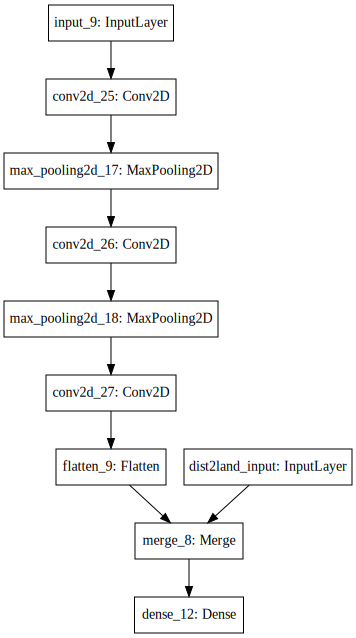

In [68]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [69]:
lr = 0.001
K.set_value(model.optimizer.lr, lr)
model.fit([np_train_crops, np_train_feature], np_train_class,
          batch_size=32,
          epochs=10,
          validation_data=([np_valid_crops, np_valid_feature], np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/10
1996/1996 [==============================] - 10s - loss: 1.1930 - acc: 0.7941 - val_loss: 0.3837 - val_acc: 0.8758
Epoch 2/10
1996/1996 [==============================] - 10s - loss: 0.2408 - acc: 0.9123 - val_loss: 0.1962 - val_acc: 0.9319
Epoch 3/10
1996/1996 [==============================] - 10s - loss: 0.1614 - acc: 0.9409 - val_loss: 0.2416 - val_acc: 0.9178
Epoch 4/10
1996/1996 [==============================] - 10s - loss: 0.1464 - acc: 0.9509 - val_loss: 0.2106 - val_acc: 0.9379
Epoch 5/10
1996/1996 [==============================] - 10s - loss: 0.1084 - acc: 0.9594 - val_loss: 0.3780 - val_acc: 0.9158
Epoch 6/10
1996/1996 [==============================] - 10s - loss: 0.0855 - acc: 0.9739 - val_loss: 0.2573 - val_acc: 0.9519
Epoch 7/10
1996/1996 [==============================] - 10s - loss: 0.0645 - acc: 0.9780 - val_loss: 0.2365 - val_acc: 0.9439
Epoch 8/10
1996/1996 [==============================] - 10s - loss: 0.0

In [84]:
model.fit([np_train_crops, np_train_feature], np_train_class,
          batch_size=32,
          epochs=10,
          validation_data=([np_valid_crops, np_valid_feature], np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/10
1996/1996 [==============================] - 10s - loss: 0.0215 - acc: 0.9940 - val_loss: 0.4625 - val_acc: 0.9078
Epoch 2/10
1996/1996 [==============================] - 10s - loss: 0.0336 - acc: 0.9890 - val_loss: 0.2898 - val_acc: 0.9479
Epoch 3/10
1996/1996 [==============================] - 10s - loss: 0.0249 - acc: 0.9930 - val_loss: 0.3455 - val_acc: 0.9379
Epoch 4/10
1996/1996 [==============================] - 10s - loss: 0.0230 - acc: 0.9905 - val_loss: 0.2765 - val_acc: 0.9519
Epoch 5/10
1996/1996 [==============================] - 10s - loss: 0.0281 - acc: 0.9910 - val_loss: 0.3130 - val_acc: 0.9459
Epoch 6/10
1996/1996 [==============================] - 10s - loss: 0.0175 - acc: 0.9935 - val_loss: 0.3436 - val_acc: 0.9359
Epoch 7/10
1996/1996 [==============================] - 10s - loss: 0.0152 - acc: 0.9960 - val_loss: 0.3443 - val_acc: 0.9359
Epoch 8/10
1996/1996 [==============================] - 10s - loss: 0.0

## baseline with distance feature + more later dense layers

In [86]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(classifier_input)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)
x = merge([x, dist2land_input], 'concat')
x = Dense(64)(x)
x = Dense(32)(x)
out = Dense(num_classes, activation='softmax')(x)

model_dense = Model(inputs=[classifier_input, dist2land_input], outputs=out)
model_dense.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: UserWarning:

The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.



In [87]:
model_dense.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_9 (InputLayer)             (None, 50, 50, 1)     0                                            
____________________________________________________________________________________________________
conv2d_37 (Conv2D)               (None, 50, 50, 32)    320         input_9[0][0]                    
____________________________________________________________________________________________________
max_pooling2d_25 (MaxPooling2D)  (None, 25, 25, 32)    0           conv2d_37[0][0]                  
____________________________________________________________________________________________________
conv2d_38 (Conv2D)               (None, 25, 25, 64)    18496       max_pooling2d_25[0][0]           
___________________________________________________________________________________________

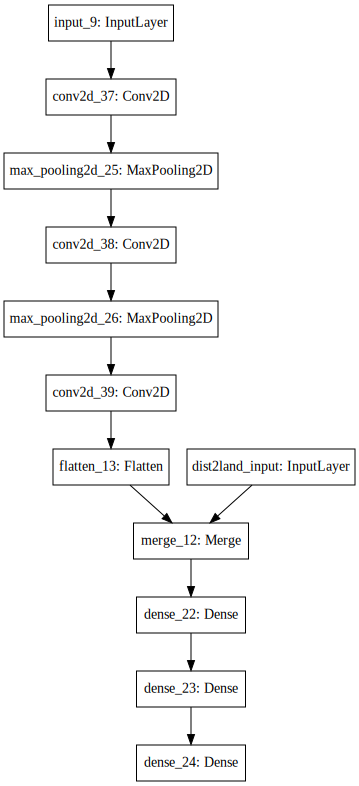

In [88]:
SVG(model_to_dot(model_dense).create(prog='dot', format='svg'))

In [89]:
lr = 0.001
K.set_value(model_dense.optimizer.lr, lr)
model_dense.fit([np_train_crops, np_train_feature], np_train_class,
          batch_size=32,
          epochs=10,
          validation_data=([np_valid_crops, np_valid_feature], np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/10
1996/1996 [==============================] - 10s - loss: 3.3230 - acc: 0.7204 - val_loss: 0.4261 - val_acc: 0.8978
Epoch 2/10
1996/1996 [==============================] - 10s - loss: 0.3091 - acc: 0.9023 - val_loss: 0.3630 - val_acc: 0.8798
Epoch 3/10
1996/1996 [==============================] - 10s - loss: 0.2154 - acc: 0.9248 - val_loss: 0.2687 - val_acc: 0.9198
Epoch 4/10
1996/1996 [==============================] - 10s - loss: 0.1638 - acc: 0.9414 - val_loss: 0.2358 - val_acc: 0.9379
Epoch 5/10
1996/1996 [==============================] - 10s - loss: 0.1275 - acc: 0.9599 - val_loss: 0.2367 - val_acc: 0.9379
Epoch 6/10
1996/1996 [==============================] - 10s - loss: 0.1201 - acc: 0.9569 - val_loss: 0.2066 - val_acc: 0.9359
Epoch 7/10
1996/1996 [==============================] - 10s - loss: 0.0895 - acc: 0.9684 - val_loss: 0.2544 - val_acc: 0.9259
Epoch 8/10
1996/1996 [==============================] - 10s - loss: 0.0

In [90]:
model_dense.fit([np_train_crops, np_train_feature], np_train_class,
          batch_size=32,
          epochs=10,
          validation_data=([np_valid_crops, np_valid_feature], np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/10
1996/1996 [==============================] - 10s - loss: 0.0351 - acc: 0.9920 - val_loss: 0.3349 - val_acc: 0.9399
Epoch 2/10
1996/1996 [==============================] - 10s - loss: 0.0544 - acc: 0.9835 - val_loss: 0.2738 - val_acc: 0.9419
Epoch 3/10
1996/1996 [==============================] - 10s - loss: 0.0687 - acc: 0.9860 - val_loss: 0.6116 - val_acc: 0.8737
Epoch 4/10
1996/1996 [==============================] - 10s - loss: 0.0333 - acc: 0.9920 - val_loss: 0.4070 - val_acc: 0.9339
Epoch 5/10
1996/1996 [==============================] - 10s - loss: 0.0563 - acc: 0.9870 - val_loss: 0.3020 - val_acc: 0.9459
Epoch 6/10
1996/1996 [==============================] - 10s - loss: 0.0365 - acc: 0.9905 - val_loss: 0.4182 - val_acc: 0.9339
Epoch 7/10
1996/1996 [==============================] - 10s - loss: 0.0261 - acc: 0.9910 - val_loss: 0.4403 - val_acc: 0.9359
Epoch 8/10
1996/1996 [==============================] - 10s - loss: 0.0

In [17]:
classifier_input = Input(shape=input_shape)
dist2land_input = Input(shape=(1,), name='dist2land_input')

x = Conv2D(32, (3, 3), activation='relu', padding='same')(classifier_input)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)

x2 = Dense(32, activation='relu')(dist2land_input)
# x2 = Dense(32, activation='relu')(x2)

x = merge([x, x2], 'concat')

out = Dense(num_classes, activation='softmax')(x)

model_dense_on_input = Model(inputs=[classifier_input, dist2land_input], outputs=out)
model_dense_on_input.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: UserWarning:

The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.



In [18]:
model_dense_on_input.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 50, 50, 1)     0                                            
____________________________________________________________________________________________________
conv2d_4 (Conv2D)                (None, 50, 50, 32)    320         input_2[0][0]                    
____________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)   (None, 25, 25, 32)    0           conv2d_4[0][0]                   
____________________________________________________________________________________________________
conv2d_5 (Conv2D)                (None, 25, 25, 64)    18496       max_pooling2d_3[0][0]            
___________________________________________________________________________________________

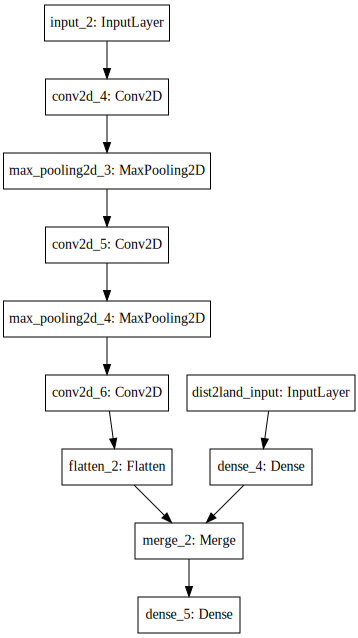

In [19]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model_dense_on_input).create(prog='dot', format='svg'))

In [20]:
lr = 0.001
K.set_value(model_dense_on_input.optimizer.lr, lr)
model_dense_on_input.fit([np_train_crops, np_train_feature], np_train_class,
          batch_size=32,
          epochs=10,
          validation_data=([np_valid_crops, np_valid_feature], np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/10
1996/1996 [==============================] - 10s - loss: 0.9476 - acc: 0.8116 - val_loss: 0.2881 - val_acc: 0.8898
Epoch 2/10
1996/1996 [==============================] - 10s - loss: 0.2422 - acc: 0.9073 - val_loss: 0.1903 - val_acc: 0.9359
Epoch 3/10
1996/1996 [==============================] - 10s - loss: 0.1801 - acc: 0.9379 - val_loss: 0.2347 - val_acc: 0.9218
Epoch 4/10
1996/1996 [==============================] - 10s - loss: 0.1373 - acc: 0.9464 - val_loss: 0.2893 - val_acc: 0.8938
Epoch 5/10
1996/1996 [==============================] - 10s - loss: 0.1158 - acc: 0.9624 - val_loss: 0.1661 - val_acc: 0.9519
Epoch 6/10
1996/1996 [==============================] - 10s - loss: 0.0715 - acc: 0.9729 - val_loss: 0.3188 - val_acc: 0.9118
Epoch 7/10
1996/1996 [==============================] - 10s - loss: 0.0584 - acc: 0.9790 - val_loss: 0.6769 - val_acc: 0.8798
Epoch 8/10
1996/1996 [==============================] - 10s - loss: 0.0

In [21]:
lr = 0.0001
K.set_value(model_dense_on_input.optimizer.lr, lr)
model_dense_on_input.fit([np_train_crops, np_train_feature], np_train_class,
          batch_size=32,
          epochs=5,
          validation_data=([np_valid_crops, np_valid_feature], np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/5
1996/1996 [==============================] - 10s - loss: 0.0075 - acc: 0.9990 - val_loss: 0.2687 - val_acc: 0.9439
Epoch 2/5
1996/1996 [==============================] - 10s - loss: 0.0028 - acc: 1.0000 - val_loss: 0.2774 - val_acc: 0.9479
Epoch 3/5
1996/1996 [==============================] - 10s - loss: 0.0015 - acc: 1.0000 - val_loss: 0.2893 - val_acc: 0.9419
Epoch 4/5
1996/1996 [==============================] - 10s - loss: 7.7723e-04 - acc: 1.0000 - val_loss: 0.3096 - val_acc: 0.9459
Epoch 5/5
1996/1996 [==============================] - 10s - loss: 5.1509e-04 - acc: 1.0000 - val_loss: 0.3691 - val_acc: 0.9419


In [22]:
lr = 0.001
K.set_value(model_dense_on_input.optimizer.lr, lr)
model_dense_on_input.fit([np_train_crops, np_train_feature], np_train_class,
          batch_size=32,
          epochs=5,
          validation_data=([np_valid_crops, np_valid_feature], np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/5
1996/1996 [==============================] - 10s - loss: 0.0449 - acc: 0.9845 - val_loss: 0.3461 - val_acc: 0.9419
Epoch 2/5
1996/1996 [==============================] - 10s - loss: 0.0321 - acc: 0.9905 - val_loss: 1.1396 - val_acc: 0.8637
Epoch 3/5
1996/1996 [==============================] - 10s - loss: 0.0304 - acc: 0.9910 - val_loss: 0.4013 - val_acc: 0.9379
Epoch 4/5
1996/1996 [==============================] - 10s - loss: 0.0249 - acc: 0.9915 - val_loss: 0.3433 - val_acc: 0.9459
Epoch 5/5
1996/1996 [==============================] - 10s - loss: 0.0175 - acc: 0.9960 - val_loss: 0.3408 - val_acc: 0.9479


In [23]:
lr = 0.00001
K.set_value(model_dense_on_input.optimizer.lr, lr)
model_dense_on_input.fit([np_train_crops, np_train_feature], np_train_class,
          batch_size=32,
          epochs=2,
          validation_data=([np_valid_crops, np_valid_feature], np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/2
1996/1996 [==============================] - 10s - loss: 0.0019 - acc: 0.9995 - val_loss: 0.3335 - val_acc: 0.9479
Epoch 2/2
1996/1996 [==============================] - 10s - loss: 0.0012 - acc: 0.9995 - val_loss: 0.3293 - val_acc: 0.9519


In [24]:
lr = 0.00001
K.set_value(model_dense_on_input.optimizer.lr, lr)
model_dense_on_input.fit([np_train_crops, np_train_feature], np_train_class,
          batch_size=32,
          epochs=2,
          validation_data=([np_valid_crops, np_valid_feature], np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/2
1996/1996 [==============================] - 10s - loss: 8.3430e-04 - acc: 1.0000 - val_loss: 0.3287 - val_acc: 0.9539
Epoch 2/2
1996/1996 [==============================] - 10s - loss: 5.9533e-04 - acc: 1.0000 - val_loss: 0.3316 - val_acc: 0.9539


In [25]:
lr = 0.000001
K.set_value(model_dense_on_input.optimizer.lr, lr)
model_dense_on_input.fit([np_train_crops, np_train_feature], np_train_class,
          batch_size=32,
          epochs=2,
          validation_data=([np_valid_crops, np_valid_feature], np_valid_class))

Train on 1996 samples, validate on 499 samples
Epoch 1/2
1996/1996 [==============================] - 10s - loss: 4.5561e-04 - acc: 1.0000 - val_loss: 0.3319 - val_acc: 0.9539
Epoch 2/2
1996/1996 [==============================] - 10s - loss: 4.4124e-04 - acc: 1.0000 - val_loss: 0.3322 - val_acc: 0.9539
